# **Teoría Moderna de la Detección y Estimación**
## **Clasificación máquina (Sesión I)**
### **Curso académico: 2024/2025**

*   Grado en Ingeniería de Sonido e Imagen (Grupo 66)
*   Grado en Ingeniería de Tecnologías de Telecomunicación (Grupos 91 y 92)

Departamento de Teoría de la Señal y Comunicaciones

### Carga y visualización de los datos

In [1]:
#Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Asigna un nombre a cada columna del conjunto de datos
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Lee el conjunto de datos en un dataframe de pandas
dataset = pd.read_csv(url, names=names)

In [3]:
#Otra forma de importar la base de datos iris
'''
from sklearn.datasets import load_iris
data = load_iris()
X, y = load_iris(return_X_y=True)
'''

'\nfrom sklearn.datasets import load_iris\ndata = load_iris()\nX, y = load_iris(return_X_y=True)\n'

In [4]:
#Visualización de los datos
display(dataset)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Obtención de la matriz de datos (X) y de las etiquetas (y)

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [6]:
print('El número de muestras es:', X.shape[0])
print('El número de características/muestra es:', X.shape[1])
print('El número de clases es:', len(np.unique(y)))

El número de muestras es: 150
El número de características/muestra es: 4
El número de clases es: 3


### Obtención de los conjuntos de entrenamiento y test

In [7]:
#Obtención de los conjuntos de entrenamiento y de test (70-30% proporción)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
print('El número de muestras del conjunto de entrenamiento es:', X_train.shape[0])
print('El número de muestras del conjunto de test es:', X_test.shape[0])

El número de muestras del conjunto de entrenamiento es: 105
El número de muestras del conjunto de test es: 45


Escalado de los datos (estandarización de las características)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

## **Clasificador $k$-NN (para clasificación)**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier_kNN = KNeighborsClassifier(n_neighbors=11) #hiperparámetro 'weights' = uniform (por defecto)
classifier_kNN.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=11)

In [11]:
#Obtención de las etiquetas del conjunto de test
y_pred = classifier_kNN.predict(X_test_s)

In [12]:
#Cálculo de métricas
tasa_acierto = round(np.mean(y_pred==y_test)*100,2)
tasa_fallo   = round(np.mean(y_pred!=y_test)*100,2)
print('La tasa de acierto del clasificador es: ', tasa_acierto)
print('La tasa de fallo del clasificador es: ', tasa_fallo)

score = round((classifier_kNN.score(X_test_s,y_test))*100,2)
print('El valor de score es: ', score)

La tasa de acierto del clasificador es:  95.56
La tasa de fallo del clasificador es:  4.44
El valor de score es:  95.56


In [13]:
#Matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 9  0  0]
 [ 0 19  0]
 [ 0  2 15]]


$\underline{\text{Nota}}$: En la matriz de confusión, las filas representan las clases "reales" y las columnas representan las clases "predichas".

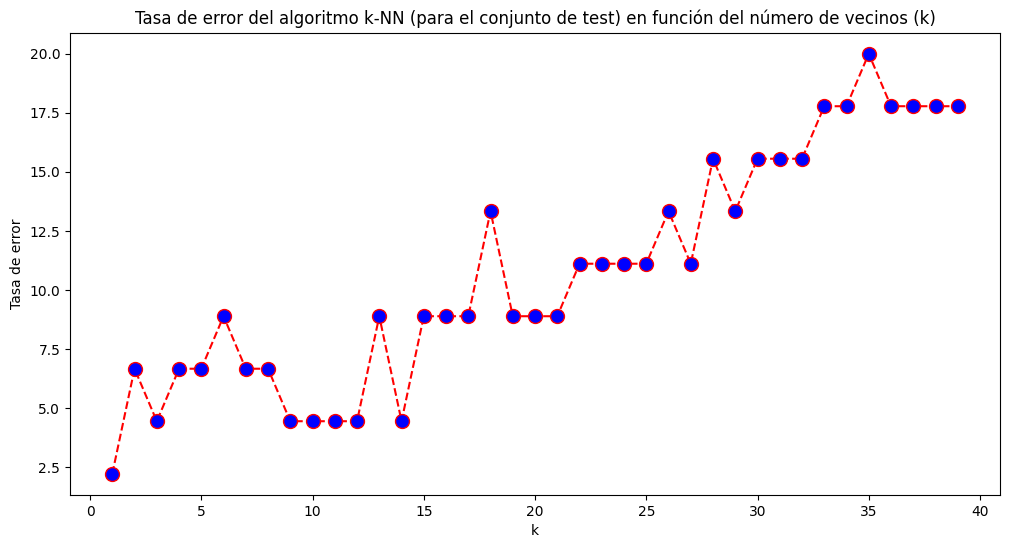

In [14]:
# Cálculo del error (del conjunto de test) para valores de k entre 1 y 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s, y_train)
    pred_i = knn.predict(X_test_s)
    error.append(np.mean(pred_i != y_test)*100)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Tasa de error del algoritmo k-NN (para el conjunto de test) en función del número de vecinos (k)')
plt.xlabel('k')
plt.ylabel('Tasa de error')
plt.show()

## **Árbol de decisión**

In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [16]:
#Obtención de las etiquetas del conjunto de test
y_pred = decision_tree.predict(X_test)

In [17]:
#Cálculo de métricas
tasa_acierto = round(np.mean(y_pred==y_test)*100,2)
tasa_fallo   = round(np.mean(y_pred!=y_test)*100,2)
print('La tasa de acierto del clasificador es: ', tasa_acierto)
print('La tasa de fallo del clasificador es: ', tasa_fallo)

score = round((classifier_kNN.score(X_test_s,y_test))*100,2)
print('El valor de score es: ', score)

La tasa de acierto del clasificador es:  93.33
La tasa de fallo del clasificador es:  6.67
El valor de score es:  95.56


In [18]:
#Matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[ 9  0  0]
 [ 0 19  0]
 [ 0  3 14]]


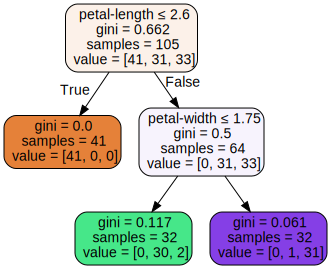

In [19]:
#Árbol de decisión
import graphviz
from sklearn import tree
feature_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
dot_Data = tree.export_graphviz(decision_tree,
                                out_file=None,
                                feature_names = feature_names,
                                filled=True,
                                rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_Data)
graph

## **Random Forest** (para clasificación)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(max_depth=2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [21]:
#Obtención de las etiquetas del conjunto de test
y_pred = rf_classifier.predict(X_test)

In [22]:
#Cálculo de métricas
tasa_acierto = round(np.mean(y_pred==y_test)*100,2)
tasa_fallo   = round(np.mean(y_pred!=y_test)*100,2)
print('La tasa de acierto del clasificador es: ', tasa_acierto)
print('La tasa de fallo del clasificador es: ', tasa_fallo)

score = round((rf_classifier.score(X_test_s,y_test))*100,2)
print('El valor de score es: ', score)

La tasa de acierto del clasificador es:  93.33
La tasa de fallo del clasificador es:  6.67
El valor de score es:  20.0


<font color = 'magenta'> Los parámetros `bootstrap` y `max_features` controlan, respectivamente, si se utiliza o no la técnica de bootstrap, así como el número máximo de caracerísticas en cada árbol.


In [23]:
#Matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[ 9  0  0]
 [ 0 19  0]
 [ 0  3 14]]
